In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx_viewer import Viewer

In [3]:
# Load edges
df = pd.read_csv('edges_qanon.csv', sep=';')
df.rename(columns=df.iloc[0], inplace=True)
df.drop(df.index[0], inplace=True)

In [4]:
# Load vertices
df_v = pd.read_csv('vertices_qanon.csv', sep=';')
df_v = df_v.drop(256)
df_v.rename(columns=df_v.iloc[0], inplace=True)
df_v.drop(df_v.index[0], inplace=True)

df_v = df_v.dropna(subset=['Vertex'])
len(df_v)

563

In [5]:
# Create graph
G = nx.Graph()
for i in range(len(df)):
    G.add_edge(df.iloc[i]['Vertex 1'], df.iloc[i]['Vertex 2'])

In [6]:
# Closeness values
closeness = nx.closeness_centrality(G)
closeness_list = list(closeness.values())

closeness_colors = []
for i in range(len(closeness_list)):
    if closeness_list[i] > 0.02:
        closeness_colors.append('red')
    else:
        closeness_colors.append('blue')

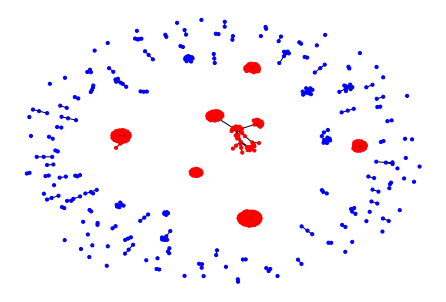

In [7]:
# Closeness graph
nx.draw(G, node_size=10, node_color=closeness_colors)
plt.show()

In [8]:
# Degree values
degree = nx.degree_centrality(G)
degree_list = list(degree.values())

degree_colors = []
for i in range(len(degree_list)):
    if degree_list[i] > 0.03:
        degree_colors.append('red')
    else:
        degree_colors.append('blue')

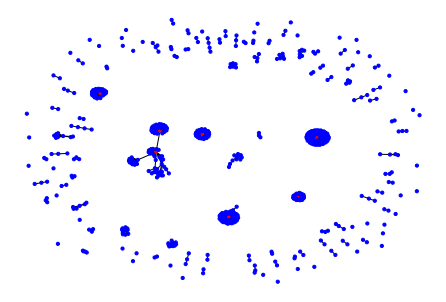

In [9]:
# Degree graph
nx.draw(G, node_size=10, node_color=degree_colors)
plt.show()

In [10]:
# Betweenness
betweenness = nx.betweenness_centrality(G)
betweenness_list = list(betweenness.values())

betweenness_colors = []
for i in range(len(betweenness_list)):
    if betweenness_list[i] > 0.01:
        betweenness_colors.append('red')
    else:
        betweenness_colors.append('blue')

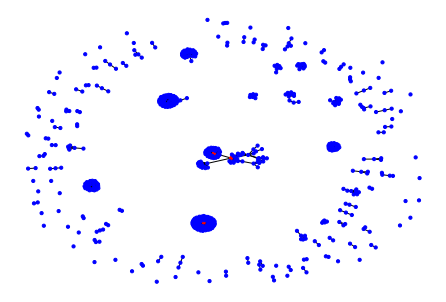

In [11]:
# Betweenness graph
nx.draw(G, node_size=10, node_color=betweenness_colors)
plt.show()

In [12]:
print(df.Relationship.unique())

['Mentions' 'Replies to' 'Tweet']


In [13]:
tweet_type_colors = []
for type in df['Relationship']:
    if type == 'Mentions':
        tweet_type_colors.append('purple')
    elif type == 'Replies to':
        tweet_type_colors.append('yellow')
    elif type == 'Tweet':
        tweet_type_colors.append('orange')

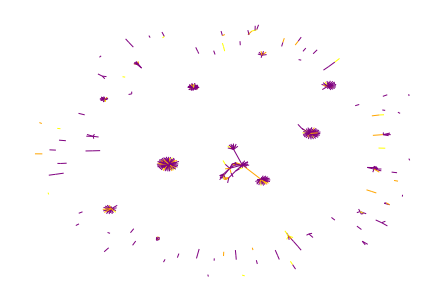

In [14]:
# Tweet type graph
nx.draw(G, node_size=0, node_color=degree_colors, edge_color=tweet_type_colors)
plt.show()

In [15]:
# Followers values
follower_colors = []
for amount in df_v['Followers']:
    if int(amount) > 100000:
        follower_colors.append('blue')
    elif int(amount) > 10000:
        follower_colors.append('green')
    else: 
        follower_colors.append('red')

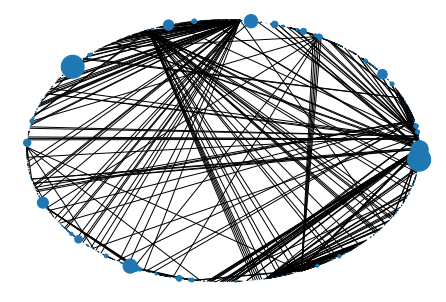

In [16]:
# Followers graph
followers_str= df_v['Followers'].tolist()
followers_int = [int(amount)/100000 for amount in followers_str]
nx.draw_circular(G, node_size=followers_int)
plt.show()

In [17]:
color_list = []
for i in range(len(closeness_list)):
    if degree_list[i] > 0.03:
        color_list.append('red')
    elif closeness_list[i] > 0.02:
        color_list.append('green')
    else:
        color_list.append('blue')

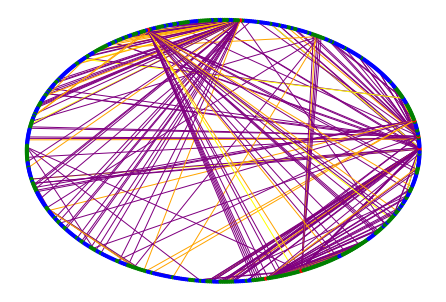

In [18]:
nx.draw_circular(G, node_size=10, node_color=color_list, edge_color=tweet_type_colors)
plt.show()

In [19]:
# Degree values
degree = nx.in_degree_centrality(G)
degree_list = list(degree.values())

degree_colors = []
for i in range(len(degree_list)):
    if degree_list[i] > 0.03:
        degree_colors.append('red')
    else:
        degree_colors.append('blue')

NetworkXNotImplemented: not implemented for undirected type

In [ ]:
# Degree graph
nx.draw(G, node_size=10, node_color=degree_colors)
plt.show()